In [2]:

import matplotlib.pylab as plt
import seaborn as sns
import pandas_profiling as pp
import numpy as np
import pandas as pd


from datetime import datetime

import statsmodels.api as sm

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

%pylab inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

C:\Users\rmadh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Populating the interactive namespace from numpy and matplotlib


C:\Users\rmadh\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<Figure size 720x540 with 0 Axes>

In [3]:
%cd "C:\Users\rmadh\Dropbox\Analytix Labs\Python\Assigments\3. Network Intrusion Detection System\NSL_Dataset"

C:\Users\rmadh\Dropbox\Analytix Labs\Python\Assigments\3. Network Intrusion Detection System\NSL_Dataset


In [4]:
train=pd.read_csv("train.txt",header=None)
test=pd.read_csv("test.txt",header=None)

# Import the Dataset

In [5]:
train

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [6]:
test

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [7]:
column_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent","hot","num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations", "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login","count","srv_count","serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [8]:
keys=range(0,43)

In [9]:
keys

range(0, 43)

In [10]:
zipper =zip(keys,column_names)

In [11]:
names=dict(zipper)
names

{0: 'duration',
 1: 'protocol_type',
 2: 'service',
 3: 'flag',
 4: 'src_bytes',
 5: 'dst_bytes',
 6: 'land',
 7: 'wrong_fragment',
 8: 'urgent',
 9: 'hot',
 10: 'num_failed_logins',
 11: 'logged_in',
 12: 'num_compromised',
 13: 'root_shell',
 14: 'su_attempted',
 15: 'num_root',
 16: 'num_file_creations',
 17: 'num_shells',
 18: 'num_access_files',
 19: 'num_outbound_cmds',
 20: 'is_host_login',
 21: 'is_guest_login',
 22: 'count',
 23: 'srv_count',
 24: 'serror_rate',
 25: 'srv_serror_rate',
 26: 'rerror_rate',
 27: 'srv_rerror_rate',
 28: 'same_srv_rate',
 29: 'diff_srv_rate',
 30: 'srv_diff_host_rate',
 31: 'dst_host_count',
 32: 'dst_host_srv_count',
 33: 'dst_host_same_srv_rate',
 34: 'dst_host_diff_srv_rate',
 35: 'dst_host_same_src_port_rate',
 36: 'dst_host_srv_diff_host_rate',
 37: 'dst_host_serror_rate',
 38: 'dst_host_srv_serror_rate',
 39: 'dst_host_rerror_rate',
 40: 'dst_host_srv_rerror_rate',
 41: 'attack',
 42: 'last_flag'}

# Rename the columns

In [12]:
train=train.rename(columns=names)
test=test.rename(columns=names)

In [13]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [139]:
 test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


# Training Data

In [14]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [73]:
pp.ProfileReport(train)

# Correlation

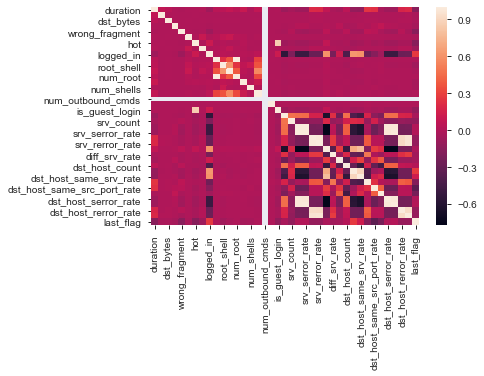

In [15]:
sns.heatmap(train.corr())

In [65]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75),x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()],
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [66]:
train_num=train.select_dtypes(include=['float64', 'int64', 'float32', 'int32']).columns

In [67]:
num_summary=train[train_num].apply(lambda x : var_summary(x))

In [86]:
len(set(train.flag))

11

In [68]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(),x.mode(),len(set(x))], 
                  index=['N', 'NMISS','MODE',"Unique_Values"])

In [69]:
train_obj=train.select_dtypes(include=['object']).columns

In [70]:
obj_summary=train[train_obj].apply(lambda x : cat_summary(x))
obj_summary.T

,N,NMISS,MODE,Unique_Values
protocol_type,125973,0,0 tcp dtype: object,3
service,125973,0,0 http dtype: object,70
flag,125973,0,0 SF dtype: object,11
attack,125973,0,0 normal dtype: object,23


# Eliminating variables

In [16]:
train=train.drop(columns="num_outbound_cmds")

In [17]:
test=test.drop(columns="num_outbound_cmds")

In [73]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [74]:
set(train.attack)

{'back',
 'buffer_overflow',
 'ftp_write',
 'guess_passwd',
 'imap',
 'ipsweep',
 'land',
 'loadmodule',
 'multihop',
 'neptune',
 'nmap',
 'normal',
 'perl',
 'phf',
 'pod',
 'portsweep',
 'rootkit',
 'satan',
 'smurf',
 'spy',
 'teardrop',
 'warezclient',
 'warezmaster'}

# Dummy creation of Categorical variables

In [18]:
for key in ["protocol_type","service","flag"]:
      train=train.join(pd.get_dummies(train[key], prefix=key)).drop(key, axis=1)
        

In [19]:
for key in ["protocol_type","service","flag"]:
      test=test.join(pd.get_dummies(test[key], prefix=key)).drop(key, axis=1)

In [30]:
len(set(train.dst_bytes))

9326

In [20]:
train["attack_status"]=np.where(train["attack"]=="normal",0,1)

In [21]:
test["attack_status"]=np.where(test["attack"]=="normal",0,1)

In [29]:
dtc = DecisionTreeClassifier()
rfe = RFE(dtc, 3)
train_target=train.drop(["attack","attack_status"],axis=1)

In [89]:
#rfe = rfe.fit(train_target, train.attack_status)
#select_features=pd.DataFrame({"Features":list(train_target.columns),"Ranking":rfe.ranking_})

In [ ]:
select_features.sort_values(by="Ranking")

In [19]:
#train[train.attack_status==1].pivot_table(index="")

In [79]:
train_x=train.drop(columns=["attack_status","attack"])

In [80]:
test_x=test.drop(columns=["attack_status","attack"])

In [32]:
logreg = LogisticRegression()
logreg.fit( train_x, train.attack_status )

C:\Users\rmadh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
train_accruracy = pd.DataFrame( { 'actual':  train.attack_status,
                            'predicted': logreg.predict( train_x ) } )

In [34]:
from sklearn import metrics

cm = metrics.confusion_matrix( train.attack_status,
                            logreg.predict( train_x ), [1,0] )
cm

array([[48855,  9775],
       [ 4467, 62876]], dtype=int64)

Text(0.5, 44.0, 'Predicted label')

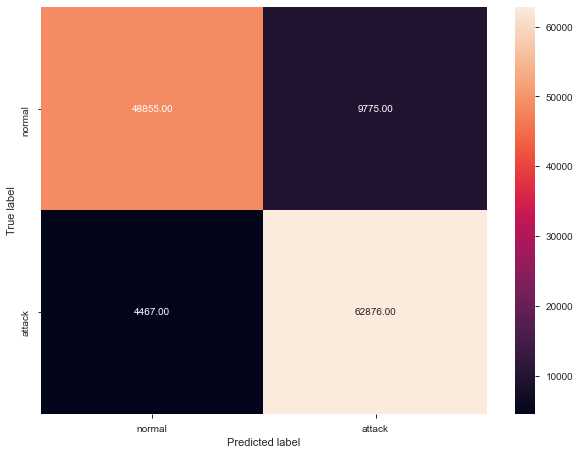

In [32]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["normal", "attack"] , yticklabels = ["normal", "attack"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [38]:
score = metrics.accuracy_score( train.attack_status, logreg.predict( train_x ) )
round( float(score), 2 )b

0.89

In [35]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit( train_x, train.attack_status )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [165]:
pd.DataFrame(clf_tree.predict(train_x),train.attack_status)

,0
attack_status,
0,0
0,0
1,1
0,0
0,0
...,...
1,1
0,0
0,0


In [166]:
metrics.accuracy_score(clf_tree.predict(train_x), train.attack_status )

1.0

In [167]:
metrics.accuracy_score(clf_tree.predict(test_x), test.attack_status)

0.8634669978708304

In [39]:
train_x=train_x.drop(columns=['service_aol', 'service_harvest', 'service_http_2784',
       'service_http_8001', 'service_red_i', 'service_urh_i'])

In [40]:
param_grid = {'max_depth': np.arange(3, 50),
             'max_features': np.arange(3,50)}

In [41]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10,n_jobs=-1)
tree.fit( train_x, train.attack_status )

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn',...
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 2

In [42]:
tree.best_params_

{'max_depth': 22, 'max_features': 48}

In [43]:
tree.best_score_

0.9991823644749271

In [46]:
clf_tree_best = DecisionTreeClassifier(max_depth= 22, max_features= 48)
clf_tree_best.fit( train_x, train.attack_status )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=22,
                       max_features=48, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [47]:
metrics.accuracy_score(clf_tree_best.predict(test_x), test.attack_status)

0.8480305180979418

# The accuracy obtained is 84% for the test data

In [53]:
set(test.attack)

{'apache2',
 'back',
 'buffer_overflow',
 'ftp_write',
 'guess_passwd',
 'httptunnel',
 'imap',
 'ipsweep',
 'land',
 'loadmodule',
 'mailbomb',
 'mscan',
 'multihop',
 'named',
 'neptune',
 'nmap',
 'normal',
 'perl',
 'phf',
 'pod',
 'portsweep',
 'processtable',
 'ps',
 'rootkit',
 'saint',
 'satan',
 'sendmail',
 'smurf',
 'snmpgetattack',
 'snmpguess',
 'sqlattack',
 'teardrop',
 'udpstorm',
 'warezmaster',
 'worm',
 'xlock',
 'xsnoop',
 'xterm'}

# Building the multinomial model

In [132]:
dos=["back","land","neptune","pod","smurf","teardrop","apache2","udpstorm","processtable","worm"]
probe=["satan","ipsweep","nmap","portsweep","mscan","saint"]
r2l=["guess_passwd","ftp_write","imap","phf","multihop","warezmaster","warezclient","spy","xlock","xsnoop","snmpguess","snmpgetattack","httptunnel","sendmail","named"]
u2r=["buffer_overflow","loadmodule","rootkit","perl","sqlattack","xterm","ps"]

In [22]:
train_x1=train[train["attack"]!="normal"]
test_x1=test[test["attack"]!="normal"]

In [23]:
train_x1.reset_index()
test_x1.reset_index()

,index,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_status
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,0,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,4,1,0,15,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,7,0,129,174,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12828,22536,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12829,22537,1,2599,293,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
12830,22538,0,1032,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
12831,22541,0,54540,8314,0,0,0,2,0,1,...,0,0,0,0,0,0,0,1,0,1


In [24]:
train_x1["attack_number"]=np.where(((train_x1["attack"]=="back")|(train_x1["attack"]=="land")|(train_x1["attack"]=="neptune")|(train_x1["attack"]=="pod")|(train_x1["attack"]=="smurf")|(train_x1["attack"]=="teardrop")|(train_x1["attack"]=="apache2")|(train_x1["attack"]=="udpstorm")|(train_x1["attack"]=="processtable")|(train_x1["attack"]=="worm")),1,np.where(((train_x1["attack"]=="satan")|(train_x1["attack"]=="ipsweep")|(train_x1["attack"]=="nmap")|(train_x1["attack"]=="portsweep")|(train_x1["attack"]=="mscan")|(train_x1["attack"]=="saint")),2,np.where(((train_x1["attack"]=="guess_passwd")|(train_x1["attack"]=="ftp_write")|(train_x1["attack"]=="imap")|(train_x1["attack"]=="phf")|(train_x1["attack"]=="multihop")|(train_x1["attack"]=="warezmaster")|(train_x1["attack"]=="warezclient")|(train_x1["attack"]=="spy")|(train_x1["attack"]=="xlock")|(train_x1["attack"]=="xsnoop")|(train_x1["attack"]=="snmpguess")|(train_x1["attack"]=="snmpgetattack")|(train_x1["attack"]=="httptunnel")|(train_x1["attack"]=="sendmail")|(train_x1["attack"]=="named")),3,np.where(((train_x1["attack"]=="buffer_overflow")|(train_x1["attack"]=="loadmodule")|(train_x1["attack"]=="rootkit")|(train_x1["attack"]=="perl")|(train_x1["attack"]=="sqlattack")|(train_x1["attack"]=="xterm")|(train_x1["attack"]=="ps")),4,0))))

C:\Users\rmadh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [162]:
set(train_x1["attack_number"])

{1, 2, 3, 4}

In [25]:
train_x1=train_x1.drop(columns=['service_aol', 'service_harvest', 'service_http_2784',
       'service_http_8001', 'service_red_i', 'service_urh_i'])

In [209]:
train_x1.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3',
       'flag_SF', 'flag_SH', 'attack_status', 'attack_number'],
      dtype='object', length=120)

In [26]:
train_x1=train_x1.drop(columns=["attack"])
train_x1=train_x1.drop(columns=["attack_status"])

In [211]:
clf_tree_2 = DecisionTreeClassifier()
clf_tree_2.fit( train_x1.drop(columns="attack_number"), train_x1.attack_number)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
test_x1["attack_number"]=np.where(((test_x1["attack"]=="back")|(test_x1["attack"]=="land")|(test_x1["attack"]=="neptune")|(test_x1["attack"]=="pod")|(test_x1["attack"]=="smurf")|(test_x1["attack"]=="teardrop")|(test_x1["attack"]=="apache2")|(test_x1["attack"]=="udpstorm")|(test_x1["attack"]=="processtable")|(test_x1["attack"]=="worm")),1,np.where(((test_x1["attack"]=="satan")|(test_x1["attack"]=="ipsweep")|(test_x1["attack"]=="nmap")|(test_x1["attack"]=="portsweep")|(test_x1["attack"]=="mscan")|(test_x1["attack"]=="saint")),2,np.where(((test_x1["attack"]=="guess_passwd")|(test_x1["attack"]=="ftp_write")|(test_x1["attack"]=="imap")|(test_x1["attack"]=="phf")|(test_x1["attack"]=="multihop")|(test_x1["attack"]=="warezmaster")|(test_x1["attack"]=="warezclient")|(test_x1["attack"]=="spy")|(test_x1["attack"]=="xlock")|(test_x1["attack"]=="xsnoop")|(test_x1["attack"]=="snmpguess")|(test_x1["attack"]=="snmpgetattack")|(test_x1["attack"]=="httptunnel")|(test_x1["attack"]=="sendmail")|(test_x1["attack"]=="named")),3,np.where(((test_x1["attack"]=="buffer_overflow")|(test_x1["attack"]=="loadmodule")|(test_x1["attack"]=="rootkit")|(test_x1["attack"]=="perl")|(test_x1["attack"]=="sqlattack")|(test_x1["attack"]=="xterm")|(test_x1["attack"]=="ps")),4,0))))

C:\Users\rmadh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
test_x1=test_x1.drop(columns=["attack"])
test_x1=test_x1.drop(columns=["attack_status"])

In [216]:
metrics.accuracy_score(clf_tree_2.predict(train_x1.drop(columns="attack_number")), train_x1.attack_number)

1.0

In [217]:
metrics.accuracy_score(clf_tree_2.predict(test_x1.drop(columns="attack_number")), test_x1.attack_number)

0.6999142834878828

In [220]:
train_x1

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_number
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
125964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
125966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [219]:
tree1 = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10,n_jobs=-1)
tree1.fit(train_x1.drop(columns="attack_number"), train_x1.attack_number)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn',...
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 2

In [221]:
tree1.best_score_

0.9992665870714651

In [223]:
tree1.best_params_

{'max_depth': 16, 'max_features': 42}

In [224]:
tree_best_1 = DecisionTreeClassifier(max_depth= 22, max_features= 48)
tree_best_1.fit(train_x1.drop(columns="attack_number"), train_x1.attack_number)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=22,
                       max_features=48, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [225]:
metrics.accuracy_score(tree_best_1.predict(test_x1.drop(columns="attack_number")), test_x1.attack_number)

0.7645912880854048

In [230]:
results={"Predicted":tree_best_1.predict(test_x1.drop(columns="attack_number")),"Actual":test_x1.attack_number}

In [231]:
res1=pd.DataFrame(results)

In [1]:
res1

NameError: name 'res1' is not defined

# The accuracy for Multinomial model is 76%

In [33]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=200 )
radm_clf.fit(train_x1.drop(columns="attack_number"), train_x1.attack_number)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
metrics.accuracy_score(radm_clf.predict(test_x1.drop(columns="attack_number")), test_x1.attack_number)

0.8022286293150471

In [44]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]

# The accuracy obtained using Random forest for multinomial model is 80%